<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Object-Features" data-toc-modified-id="Object-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Object Features</a></span></li><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Skewness</a></span></li></ul></li><li><span><a href="#Targets" data-toc-modified-id="Targets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Targets</a></span><ul class="toc-item"><li><span><a href="#Binary-target" data-toc-modified-id="Binary-target-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Binary target</a></span></li><li><span><a href="#Discrete-Target" data-toc-modified-id="Discrete-Target-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Discrete Target</a></span></li><li><span><a href="#Socio-economic-environment-and-urbanicity" data-toc-modified-id="Socio-economic-environment-and-urbanicity-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Socio-economic environment and urbanicity</a></span></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Correlations-between-numerical-features,-excluding-US-census-data" data-toc-modified-id="Correlations-between-numerical-features,-excluding-US-census-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Correlations between numerical features, excluding US census data</a></span></li><li><span><a href="#Promotion-history-correlations" data-toc-modified-id="Promotion-history-correlations-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Promotion history correlations</a></span></li><li><span><a href="#Giving-history-correlations" data-toc-modified-id="Giving-history-correlations-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Giving history correlations</a></span></li><li><span><a href="#Puttting-donors-on-a-map" data-toc-modified-id="Puttting-donors-on-a-map-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Puttting donors on a map</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Categorical features</a></span></li><li><span><a href="#The-US-census-data" data-toc-modified-id="The-US-census-data-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>The US census data</a></span></li><li><span><a href="#Income,-Wealth-and-donations" data-toc-modified-id="Income,-Wealth-and-donations-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Income, Wealth and donations</a></span></li></ul></li></ul></div>

# Exploratory Data Analysis
This notebook contains all code for the prelimiatory analysis of the KDD Cup 98 datasets

In [1]:
%load_ext autoreload

In [2]:
# Set up logging and graphics defaults
%run ./common_init.ipynb

Setup logging to file: out.log
Figure output directory saved in figure_output at /home/datarian/OneDrive/unine/Master_Thesis/figures


In [3]:
%autoreload 2

import kdd98.data_handler as dh
import kdd98.utils_transformer as ut
from kdd98.transformers import *

# Where to save the figures
IMAGES_PATH = pathlib.Path(figure_output/'eda')

pathlib.Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = pathlib.Path(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Using TensorFlow backend.


In [4]:
plt.rcParams['figure.figsize'] = (12, 8)

In [5]:
data_handler = dh.KDD98DataProvider("cup98LRN.txt")
learning = data_handler.clean_data

## Overview

A first, general look at the data structure:

In [6]:
learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Columns: 520 entries, ODATEDW to DOMAINSocioEconomic
dtypes: Int64(84), category(40), float64(49), int64(297), object(50)
memory usage: 361.6+ MB


* There are 481 features (of which one is the index)
* A total of 95412 examples
* 24 categorical features, 53 datetime features, 48 numerical features with missing values, 297 integer features without missing values and 56 string features

In [7]:
learning.head()

ODATEDW OSOURCE TCODE STATE    ZIP  MAILCODE PVASTATE  NOEXCH  \
CONTROLN                                                                 
95515       8901     GRI     0    IL  61081         0      NaN     NaN   
148535      9401     BOA     1    CA  91326         0      NaN     NaN   
15078       9001     AMH     1    NC  27017         0      NaN     NaN   
172556      8701     BRY     0    CA  95953         0      NaN     NaN   
7112        8601     NaN     0    FL  33176         0      NaN     NaN   

          RECINHSE  RECP3  ...  RFA_22F  RFA_22A RFA_23R  RFA_23F  RFA_23A  \
CONTROLN                   ...                                               
95515            0      0  ...        4        5       S        4        5   
148535           0      0  ...        1        5     NaN      NaN       -1   
15078            0      0  ...        4        4       S        4        4   
172556           0      0  ...        1        4     NaN      NaN       -1   
7112             1      1  ...        4        5       A        3        4   

          RFA_24R RFA_24F RFA_24A DOMAINUrbanicity DOMAINSocioEconomic  
CONTROLN                                                                
95515           S       4       5                T                   2  
148535          F       1       5                S                   1  
15078           S       3       4                R                   2  
172556        NaN     NaN      -1                R                   2  
7112            A       3       4                S                   2  

[5 rows x 520 columns]

### Numerical Features

In [8]:
numerical = learning.select_dtypes(include=np.number).columns
print("There are {:1} numerical features".format(len(numerical)))

There are 430 numerical features


### Categorical Features

Categories were defined on import of the csv data. The categories were identified in the dataset dictionary.

In [9]:
categories = learning.select_dtypes(include='category').columns
print(categories)

Index(['OSOURCE', 'TCODE', 'STATE', 'PVASTATE', 'CLUSTER', 'CHILD03',
       'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH',
       'GEOCODE', 'LIFESRC', 'RFA_2R', 'GEOCODE2', 'RFA_3R', 'RFA_4R',
       'RFA_5R', 'RFA_6R', 'RFA_7R', 'RFA_8R', 'RFA_9R', 'RFA_10R', 'RFA_11R',
       'RFA_12R', 'RFA_13R', 'RFA_14R', 'RFA_15R', 'RFA_16R', 'RFA_17R',
       'RFA_18R', 'RFA_19R', 'RFA_20R', 'RFA_21R', 'RFA_22R', 'RFA_23R',
       'RFA_24R', 'DOMAINUrbanicity'],
      dtype='object')


In [10]:
learning.loc[:, categories].describe().transpose()

count unique  top   freq
OSOURCE           94484    895  MBC   4539
TCODE             95412     55    0  40917
STATE             95412     57   CA  17343
PVASTATE           1458      2    P   1453
CLUSTER           93096     53   40   3979
CHILD03            1146      3    M    869
CHILD07            1566      3    M   1061
CHILD12            1811      3    M   1149
CHILD18            2847      3    M   1442
GENDER            92455      6    F  51277
DATASRCE          74132      3    3  43549
SOLP3               180      4   00     80
SOLIH              6200      7   12   5693
GEOCODE           15244      7   12   3914
LIFESRC           41380      3    2  20027
RFA_2R            95412      1    L  95412
GEOCODE2          95093      4    A  34484
RFA_3R            93462      5    A  59567
RFA_4R            93100      5    A  59353
RFA_5R            61822      4    A  41455
RFA_6R            91855      8    A  48176
RFA_7R            86538      8    A  43406
RFA_8R            91901      8    A  45179
RFA_9R            84167      8    A  40978
RFA_10R           62664      6    A  35785
RFA_11R           84990      7    A  39904
RFA_12R           86489      8    A  40462
RFA_13R           55193      7    A  28561
RFA_14R           76545      8    A  38306
RFA_15R           29935      4    A  14900
RFA_16R           74995      8    A  33507
RFA_17R           67762      8    A  29125
RFA_18R           74149      8    A  31095
RFA_19R           70920      8    A  30416
RFA_20R           45212      7    A  24951
RFA_21R           60200      7    A  26546
RFA_22R           69764      8    A  29086
RFA_23R           39116      7    A  20101
RFA_24R           58439      8    A  29305
DOMAINUrbanicity  93096      5    S  21924

### Object Features

The date features are not yet encoded into actual dates. Therefore, they still show as objects.

In [11]:
objects = learning.select_dtypes(include='object').columns
print(objects)

Index(['ODATEDW', 'ADATE_2', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6',
       'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12',
       'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18',
       'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24',
       'MAXADATE', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7',
       'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13',
       'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19',
       'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'MINRDATE',
       'MAXRDATE', 'LASTDATE'],
      dtype='object')


In [12]:
learning.loc[:, objects].describe()

ODATEDW ADATE_2 ADATE_3 ADATE_4 ADATE_5 ADATE_6 ADATE_7 ADATE_8  \
count    95412   95412   95412   95412   95412   95412   95412   95412   
unique      54       2       3       9       2       3       4       6   
top       9501    9706    9606    9604    9604    9603    9602    9601   
freq     15358   95399   93444   92405   61822   91804   81512   85468   

       ADATE_9 ADATE_10  ... RDATE_18 RDATE_19 RDATE_20 RDATE_21 RDATE_22  \
count    95412    95412  ...    95412    95412    95412    95412    95412   
unique       4        3  ...       15       14       11       13       14   
top       9511     9510  ...      nan      nan      nan      nan      nan   
freq     80718    57562  ...    75634    79535    87524    85899    74539   

       RDATE_23 RDATE_24 MINRDATE MAXRDATE LASTDATE  
count     95412    95412    95412    95412    95412  
unique       18       15      146      150       24  
top         nan      nan     9602     9512     9512  
freq      87553    77674     3041    10563    19896  

[4 rows x 50 columns]

### Skewness

Pandas calculates the adjusted Fisher-Pearson standardized moment coefficient.

In [13]:
learning_preprocessed = data_handler.preprocessed_data

In [14]:
learning_skew = learning_preprocessed.skew()

In [15]:
n = len(learning_preprocessed.index)
cb = 1.96*np.sqrt(6*n*(n-1)/((n-2)*(n+1)*(n+3))) / np.sqrt(n)
cb

5.0317826062095015e-05

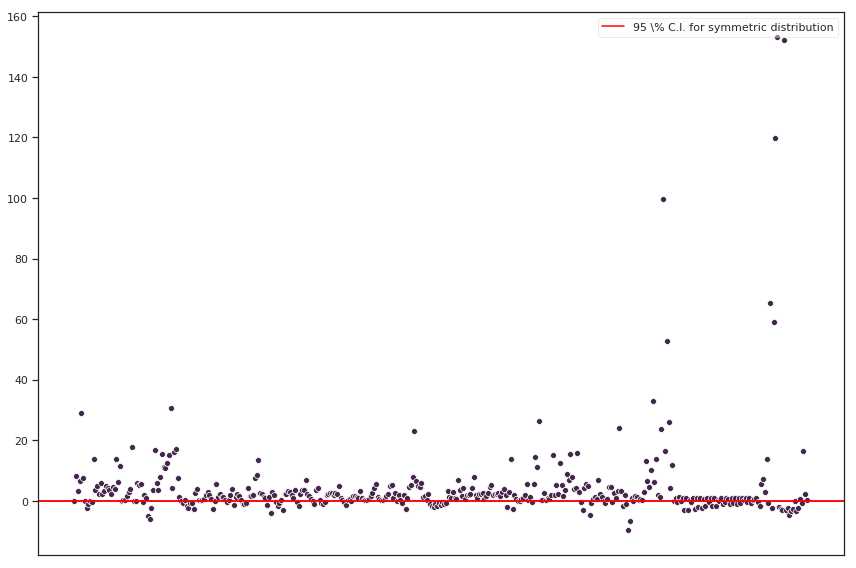

In [20]:
ax = sns.scatterplot(data=learning_skew)
cb_high = ax.axhline(cb, c="red", label="95 \% C.I. for symmetric distribution")
cb_low = ax.axhline(-cb, c="red")
plt.legend(handles=[cb_high])
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
save_fig("skewness_numeric_features")

In [23]:
most_skewed = learning_skew[np.abs(learning_skew) > 20].index.values.tolist()
most_skewed

['RECPGVG',
 'ETH12',
 'TPE6',
 'AFC3',
 'HC15',
 'RAMNT_18',
 'MINRAMNT',
 'MAXRAMNT',
 'TIMELAG',
 'AVGGIFT',
 'MONTHS_TO_DONATION_8',
 'MONTHS_TO_DONATION_10',
 'MONTHS_TO_DONATION_11',
 'MONTHS_TO_DONATION_12',
 'MONTHS_TO_DONATION_16']

In [6]:
learning_preprocessed.loc[:,most_skewed].hist()

NameError: name 'learning_preprocessed' is not defined

For the categorical features, we plot histograms

In [ ]:
pd.plotting.scatter_matrix(learning_preprocessed.select_dtypes(include="category").apply(pd.Series.value_counts, axis=1))

In [ ]:
numeric_features = learning.select_dtypes(include="number")
stat, p_agost = stats.normaltest(numeric_features,axis=0,nan_policy='omit')

In [ ]:
agost_skew = pd.DataFrame({'Feature': learning.select_dtypes(include=np.float64), 'DAgostino_stat': stat, 'DAgostino_pval': p_agost})

In [ ]:
anderson_skew = learning.select_dtypes(include=np.float64).apply(stats.anderson, axis=0).reset_index()

In [ ]:
df_skewtest = pd.DataFrame({'Feature': learning.select_dtypes(include=np.float64).columns, 'Statistic': anderson_skew.statistic, 'P_val': anderson_skew.pvalue})

## Targets

### Binary target
TARGET_B indicates wheter an example donated in the current campaign.

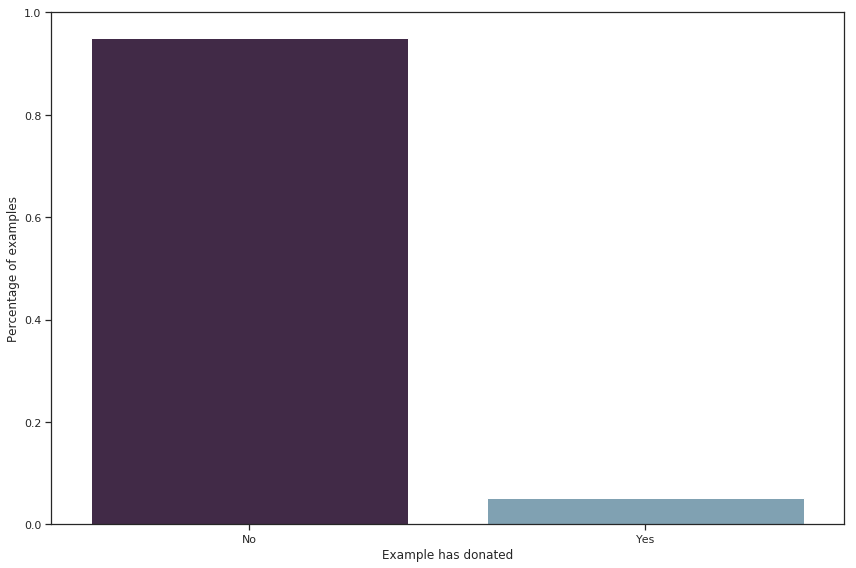

In [26]:
fig = sns.barplot(x = [0,1], y = learning.groupby('TARGET_B')['TARGET_B'].count()/len(learning.index),
                  palette=Config.get("color_palette_binary"));
fig.set_xticklabels(["No", "Yes"]);
plt.xlabel("Example has donated");
plt.ylabel("Percentage of examples");
plt.ylim([0,1])
save_fig(fig_id="_ratio_binary");

### Discrete Target
TARGET_D represents the dollar amount donated in the current campaign.

In [27]:
learning.TARGET_D = learning.TARGET_D.astype('float64')

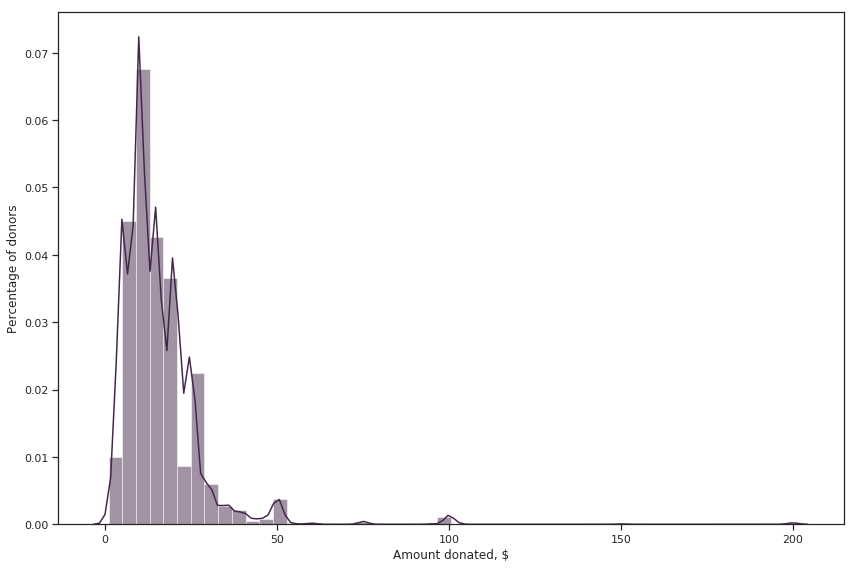

In [28]:
fig = sns.distplot(learning.loc[learning.TARGET_D > 0, 'TARGET_D'], bins=50, hist_kws={'alpha': 0.5}, color=Config.get("color_palette")[0])
plt.ylabel("Percentage of donors");
plt.xlabel("Amount donated, \$")
save_fig('target_distribution')

In [29]:
learning.loc[learning.TARGET_D > 0.0, 'TARGET_D'].median()

13.0

* The label is imbalanced, with roughly 95% / 5%
* Most donations are below 20 dollars. The median is 13 \$
* Spikes are visible for 5, 10, 15, 20, 25, 50, 100 and 200 $
* The distribution is right-skewed

Checking the claim from the documentation that donations are positively correlated with the time since the last donation. We plot the duration since the last gift against the donation amount for the current campaign. The marker size indicates the total number of times an example has donated so far.

It is evident that from a lag of &geq; 15 months, donations increase indeed, and over the whole spectrum of amounts. We see a marked difference in 100- and 50 $ donations.

For this analysis, we need to transform the raw date features to time differences. When preprocessing the data, this is taken care of. So we briefly get the preprocessed data for this:

In [30]:
learning_preproc = data_handler.preprocessed_data

In [31]:
learning_preproc.TARGET_D = learning_preproc.TARGET_D.astype("float64")

In [32]:
learning_preproc.AVGGIFT.describe()

count    95412.000000
mean        13.347786
std         10.769997
min          1.285714
25%          8.384615
50%         11.636364
75%         15.477955
max       1000.000000
Name: AVGGIFT, dtype: float64

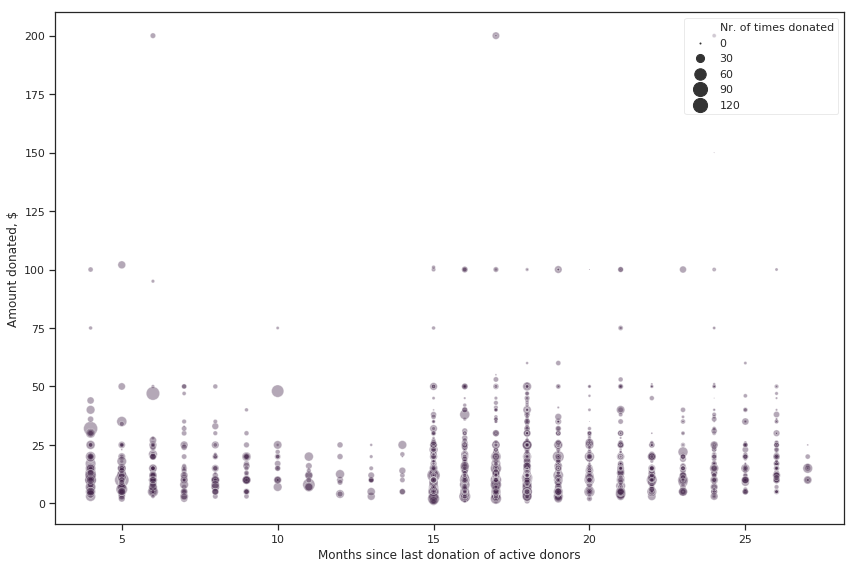

In [33]:
sns.scatterplot(x='LASTDATE_DELTA_MONTHS',y='TARGET_D', size='Nr. of times donated', alpha=0.4, data=learning_preproc.loc[learning.TARGET_D > 0,:].rename(columns = {"NGIFTALL": "Nr. of times donated"}),
                palette=Config.get("color_palette_binary"), sizes=(1, 200))

plt.xlabel("Months since last donation of active donors");
plt.ylabel("Amount donated, \$");
save_fig(fig_id="donations_vs_time_since_last")

### Socio-economic environment and urbanicity

Donations by living environment (C=City, R=Rural, S=Suburban, T=Town,U=Urban; lowest numbers represent highest socio-economic ranking). Major donors versus non-major donors.

Surprisingly, one of the top donations came from a rural region of low socio-economic status. Major donors that donated this time are not present in the lowest socio-economic environments.

In [34]:
learning.MAJOR.describe()

count    95412.000000
mean         0.003081
std          0.055425
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: MAJOR, dtype: float64

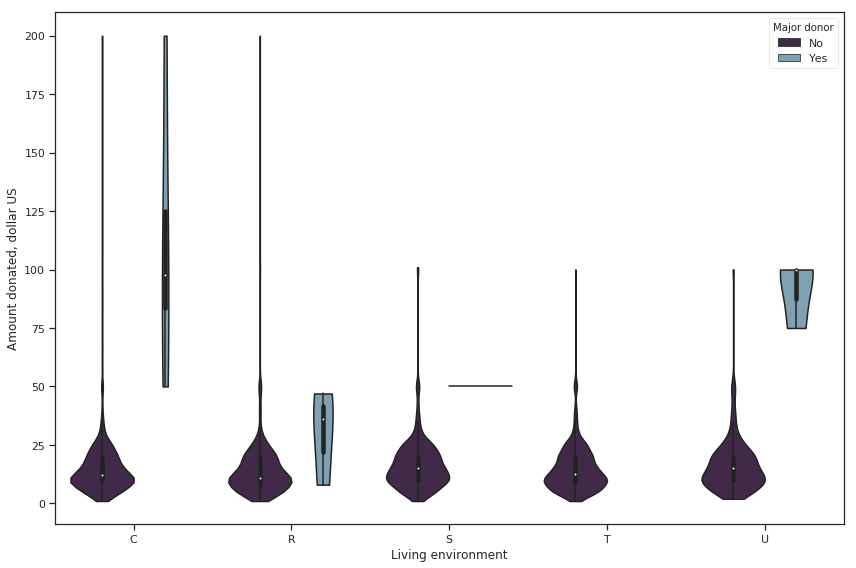

In [35]:
learning.MAJOR = learning.MAJOR.map({0: "No", 1: "Yes"})
sns.violinplot(y="TARGET_D", x="DOMAINUrbanicity", hue='Major donor',cut=0, data=learning.loc[learning.TARGET_D > 0,["TARGET_D", "DOMAINUrbanicity", "MAJOR"]].rename(columns = {"MAJOR": "Major donor"}),
               palette=Config.get("color_palette_binary"), legend_out=True)
                   
#new_labels = ['No', 'Yes']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel("Living environment");
plt.ylabel("Amount donated, dollar US");
save_fig(fig_id="donations_vs_living_environment")

All-time donations by environment. The y- axis is in log scale. We see now that each socio-economic environment also harbours major donors.

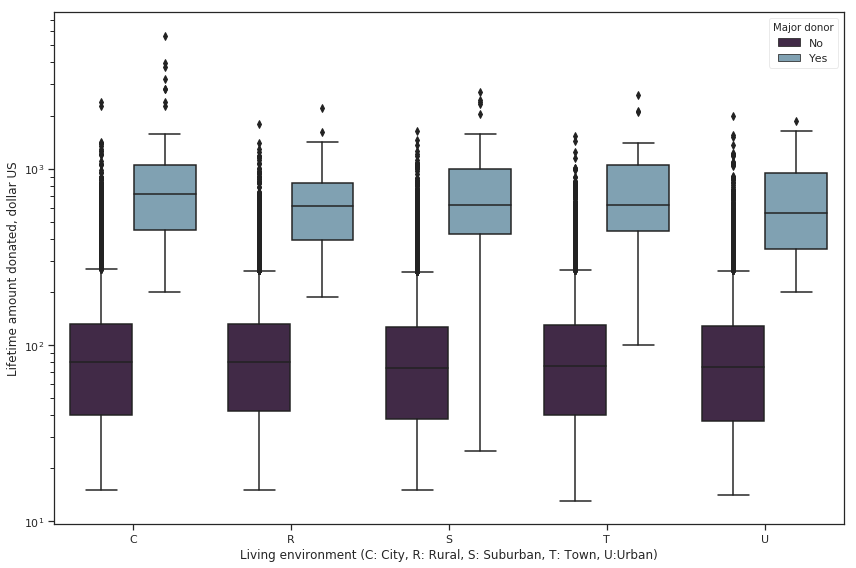

In [36]:
fig=sns.boxplot(y="RAMNTALL", x="DOMAINUrbanicity", hue='Major donor', data=learning.rename(columns = {"MAJOR": "Major donor"}),palette=Config.get("color_palette_binary"))
fig.set_yscale('log')
plt.xlabel("Living environment (C: City, R: Rural, S: Suburban, T: Town, U:Urban)");
plt.ylabel("Lifetime amount donated, dollar US");
save_fig(fig_id="all_time_donations_vs_living_environment")

/data/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


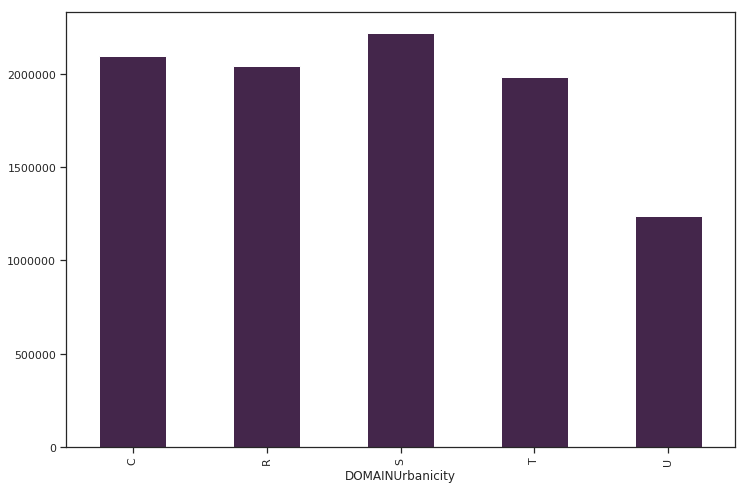

In [37]:
urb_aggr = {
    "RAMNTALL": {
        "total_donations": 'sum',
        'average_per_capita': lambda x: sum(x) / len(x)
    }
}

urb_aggregated = learning.groupby("DOMAINUrbanicity").agg(urb_aggr)
urb_aggregated.RAMNTALL.total_donations.plot(kind="bar", colormap=Config.get("color_map"))

In [38]:
urb_aggregated

RAMNTALL                   
                 total_donations average_per_capita
DOMAINUrbanicity                                   
C                     2093369.00         106.321753
R                     2042308.85         103.199032
S                     2217430.10         101.141676
T                     1983062.63         101.554905
U                     1235531.07         101.556064

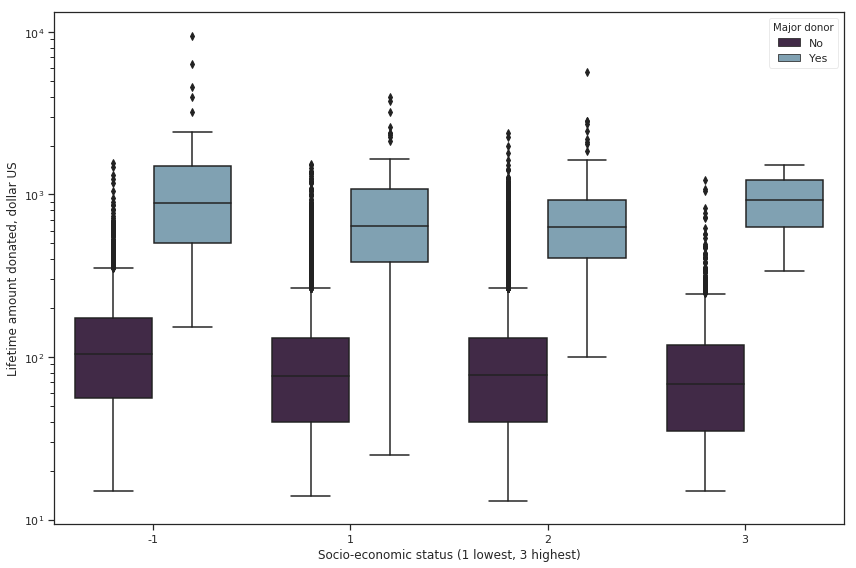

In [39]:
fig=sns.boxplot(y="RAMNTALL", x="DOMAINSocioEconomic", hue='Major donor', data=learning.rename(columns = {"MAJOR": "Major donor"}),palette=Config.get("color_palette_binary"))
fig.set_yscale('log')
plt.xlabel("Socio-economic status (1 lowest, 3 highest)");
plt.ylabel("Lifetime amount donated, dollar US");
save_fig(fig_id="all_time_donations_vs_socio_economic")

### Correlations

Since there are so many features, we will plot those who have a significant correlation only.

In [40]:
corr_all = learning.drop(['TARGET_B','TARGET_D'], axis=1).corr()

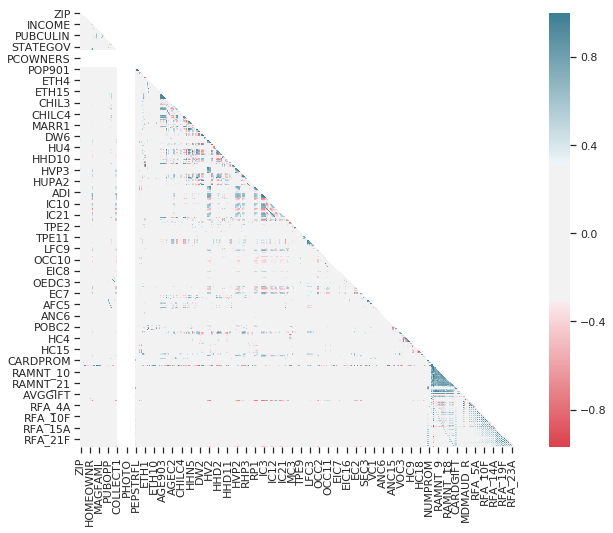

In [41]:
mask_all = np.zeros_like(corr_all, dtype=np.bool)
mask_all[np.triu_indices_from(mask_all)] = True

sns.heatmap(corr_all,
            cmap=Config.get("color_map_diverging"), mask=mask_all, vmax=1.0, center = 0.0, square=True,
            linewidths = 0)

### Correlations between numerical features, excluding US census data

In [42]:
data_exclude_census_numeric = learning[learning.columns.difference(dh.US_CENSUS_FEATURES)].select_dtypes(include=["float64"])

In [43]:
data_exclude_census_corr = data_exclude_census_numeric[data_exclude_census_numeric.columns.difference(['TARGET_B','TARGET_D'])].corr()

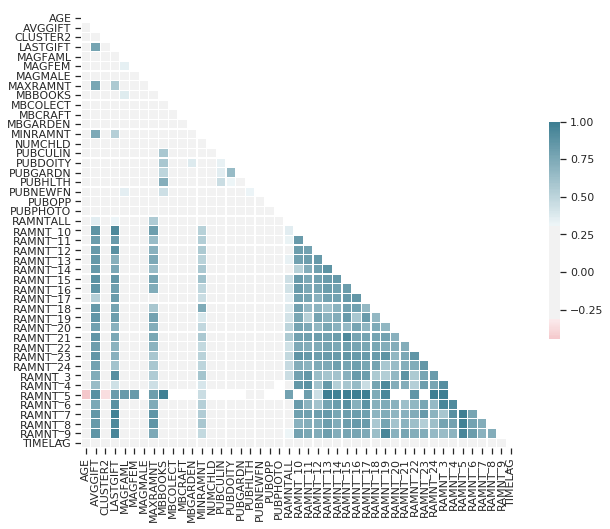

In [44]:
mask_census = np.zeros_like(data_exclude_census_corr, dtype=np.bool)
mask_census[np.triu_indices_from(mask_census)] = True

sns.heatmap(data_exclude_census_corr, mask=mask_census, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)

### Promotion history correlations

In [ ]:
donation_responses = learning.loc[:,dh.GIVING_HISTORY + dh.GIVING_HISTORY_SUMMARY]
multibytes = learning.loc[:,]

In [47]:
promotion_history_features = learning.reindex(columns=dh.PROMO_HISTORY_SUMMARY+dh.PROMO_HISTORY_DATES)
prom_hist_corr = promotion_history_features[promotion_history_features.columns.difference(['TARGET_B','TARGET_D'])].corr()

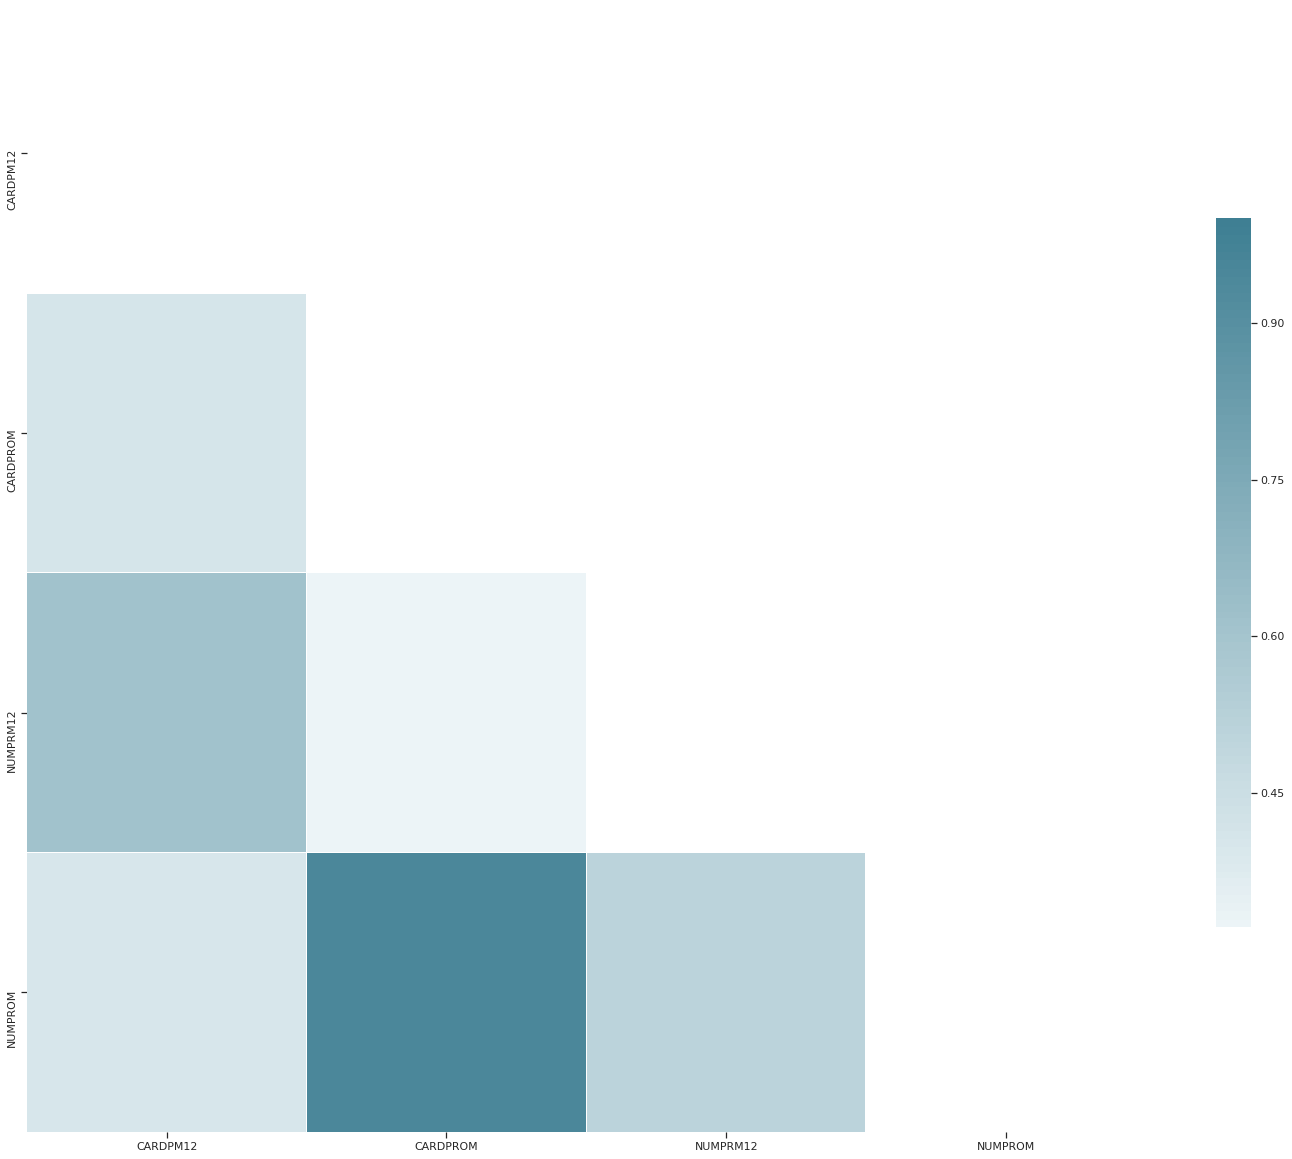

In [48]:
mask_promo = np.zeros_like(prom_hist_corr, dtype=np.bool)
mask_promo[np.triu_indices_from(mask_promo)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(prom_hist_corr, mask=mask_promo, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_promotion_giving_history")

### Giving history correlations

In [50]:
giving_hist_f = dh.GIVING_HISTORY + dh.GIVING_HISTORY_SUMMARY +['LASTDATE_DELTA_MONTHS', 'MINRDATE_DELTA_MONTHS',
       'MAXRDATE_DELTA_MONTHS', 'MAXADATE_DELTA_MONTHS']
giving_history_features = learning.reindex(columns=giving_hist_f)
giving_corr = giving_history_features[giving_history_features.columns.difference(['TARGET_B','TARGET_D'])]

In [ ]:
mask_giving = np.zeros_like(giving_corr, dtype=np.bool)
mask_giving[np.triu_indices_from(mask_giving)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(giving_corr, mask=mask_giving, cmap=Config.get("color_map_diverging"), vmax=1.0, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, xticklabels=True,yticklabels=True)
save_fig(fig_id="correlations_giving_history")

### Puttting donors on a map

In [ ]:
num_donors_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('sum') # number of people who donated
num_members_by_zip = learning[['ZIP', 'TARGET_B']].groupby('ZIP', as_index=False).agg('count') # number of people who are registered at that ZIP
cum_donation_by_zip = learning[['ZIP', 'TARGET_D']].groupby('ZIP', as_index=False).agg('sum')
zip_states = learning[['ZIP','STATE']].drop_duplicates()

In [ ]:
data_by_zip = cum_donation_by_zip.merge(num_members_by_zip, on='ZIP').merge(zip_states, on='ZIP')
data_by_zip.columns = ["ZIP", "CumDonation", "MemberCount", "State"]

In [ ]:
def rel_donation(row):
    if row.CumDonation != 0.0:
        return row.CumDonation/(1.0 if row.MemberCount == 0.0 else row.MemberCount)
    else:
        return 0.0

data_by_zip['RelDonation'] = data_by_zip.apply(rel_donation,axis=1)

In [ ]:
from geopy.geocoders import Here
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

def do_geo_query(q):
    geolocator = Here(app_id="ZJBxigwxa1QPHlWrtWH6", app_code="OJBun02aepkFbuHmYn1bOg")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.01, max_retries=4)
    try:
        return geolocator.geocode(query=q, exactly_one=True)
    except GeocoderTimedOut:
        return do_geo_query(q)

def get_loc(example):
    if example.ZIP:
        zip = str(int(example.ZIP)).rjust(5, '0')
        q = {'postalcode': zip, 'state': example.State}
        return do_geo_query(q)
    else:
        return None
    
def extract_coords(location):
    return [location.latitude, location.longitude]

In [ ]:
import pickle
from tqdm import tqdm

tqdm.pandas()

try:
    zip_data = open(pathlib.Path(Config.get("data_dir"),"zip_data.pkl").resolve(), "rb")
    locations = pickle.load(zip_data)
    zip_data.close()
except Exception as e:
    locations = data_by_zip.progress_apply(get_loc, axis=1)
    locations = pd.DataFrame(locations, columns="location")
    locations['ZIP'] = data_by_zip.ZIP
    with open(pathlib.Path(Config.get("data_dir"),"zip_data.pkl").resolve(), "wb") as zip_data:
        pickle.dump(locations, zip_data)


In [ ]:
data_by_zip = data_by_zip.merge(locations, on='ZIP')

In [ ]:
data_by_zip.loc[:,'longitude'] = data_by_zip.location.apply(lambda l: l.longitude if l != None else None)
data_by_zip.loc[:,'latitude'] = data_by_zip.location.apply(lambda l: l.latitude if l != None else None)

AA, AE and AP stand for armed services. ZIP codes don't work here, they point anywhere. Also, we only include locations where someone has actually donated by filtering on CumDonation.

In [ ]:
data_by_zip1 = data_by_zip.loc[data_by_zip.State != ['AA','AE','AP'],:]
data_by_zip2 = data_by_zip1.loc[data_by_zip1.CumDonation > 0.0,:]

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature
fig = plt.figure(figsize=(20,16))

osm_terrain = cimgt.OSM()


ax = fig.add_subplot(1, 1, 1, projection=osm_terrain.crs)

ax.set_extent([-166, -65, 10, 65], crs=ccrs.PlateCarree())
ax.set_extent([-130, -65, 10, 52], crs=ccrs.PlateCarree())
ax.add_image(osm_terrain, 6)

lon = data_by_zip2.longitude
lat = data_by_zip2.latitude
mc = data_by_zip2.MemberCount
cd = data_by_zip2.CumDonation
rd = data_by_zip2.RelDonation

data_by_zip2.plot(kind="scatter",x="longitude",y="latitude",ax=ax,
                  s=cd, c=rd, label="Cumulative Donations",
                  legend=True, alpha=0.4, cmap=Config.get("color_map"),
                  subplots=True, colorbar=True, transform=ccrs.PlateCarree())
            
save_fig(fig_id="donations_geographical")

* Most donations come from the urban areas, especially San Francisco, Los Angeles, Miami, Chicago and Detroit. To a lesser extent, cities like Houston, Dallas, Minneapolis, Atlanta, Tampa, Seattle and Phoenix can be made out.
* Interestingly, the East Coast has not donated, despite featuring some large metropolitan areas like New York, Boston, or Washington

### Categorical features

In [ ]:
categories = learning.select_dtypes("category").copy()
target = learning['TARGET_B'].astype("category")
categories = categories.drop('TARGET_B', axis=1)
#categories['TARGET_B'] = learning.TARGET_B.astype("category")
#categories['TARGET_D'] = learning.TARGET_D
#categories_grouped = categories.groupby('TARGET_B')

In [ ]:
len(categories.columns.values)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
lm.fit(np.ndarray(categories),y=np.ndarray(target))

In [ ]:
pd.crosstab(categories.TARGET_D,[categories.INCOME],margins=True)

### The US census data

In [ ]:
census = learning[dh.us_census_features]
census_corr = census.corr()

In [ ]:
mask = np.zeros_like(census_corr, dtype=np.binary)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(census_corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})
save_fig(fig_id="correlation_census")

In [ ]:
census.select_dtypes(include="int64")

### Income, Wealth and donations

In [ ]:
inc_targ = sns.violinplot(x="INCOME", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["INCOME","TARGET_D"]])
inc_targ.set_yscale('log')
plt.show()

In [ ]:
weal1_targ = sns.violinplot(x="WEALTH1", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH1","TARGET_D"]])
weal1_targ.set_yscale('log')
plt.show()

In [ ]:
weal2_targ = sns.violinplot(x="WEALTH2", y="TARGET_D", data=learning.loc[learning.TARGET_D > 0.0, ["WEALTH2","TARGET_D"]])
weal2_targ.set_yscale('log')
plt.show()

In [ ]:
sns.catplot(x="WEALTH2", y="TARGET_D", hue="MAJOR",
            kind="violin", inner="stick", split=True, data=learning.loc[learning.TARGET_D > 0.0,:].rename())

In [ ]:
sns.catplot(x="CLUSTER", y="TARGET_D", kind="box", data=learning)

In [ ]:
sns.distplot(learning.loc[learning.TARGET_D > 0.0,
                          'TARGET_D'], bins=50, kde=False, rug=True)

In [ ]:
learning.select_dtypes(include=np.float).hist(bins=50, figsize=(50, 50))
plt.show()
save_fig("float_feature_histograms")